# Plot Kohn Shan eigenvalues

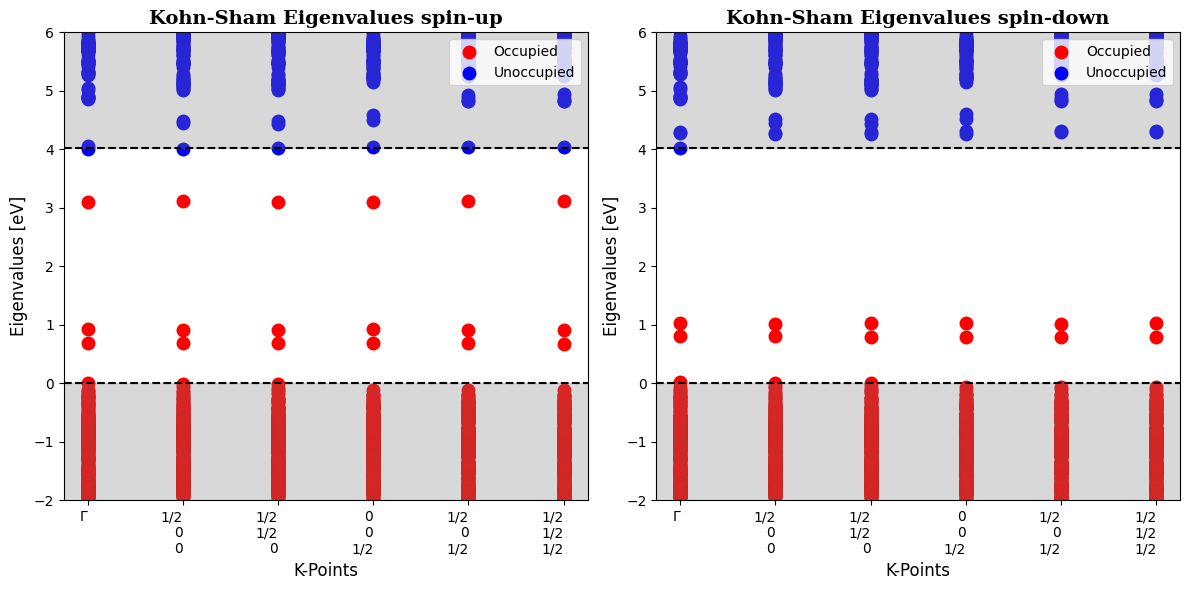

In [1]:
from VaspDefAnalysis.read_vasp.vasprun_analysis import VaspRunAnalysis
from VaspDefAnalysis.plotter.plot_KS_eigenvalues import PlotKohnShamEigenvalue
from VaspDefAnalysis.utils.path_save_output import SaveOutput

save = SaveOutput('/home/luis/Downloads/assignmeant_MENA_curso/mena_project/')

# Creat an istance of the VaspRunAnalysis class
vasprum_id = '/home/luis/master_thesis_uio/thesis_project/output_from_vasp_saga/project_AlN/calcualtion_steps/supercell/defect_supercell/GGA-PBE/defect/C_N-C_Al/C_N-C_Al_-1/vasprun.xml'
vasprun_analysis = VaspRunAnalysis(vasprun_path=vasprum_id)
eigenvalues_dict, occupancy_dict = vasprun_analysis.get_Kohn_Sham_eigenvalues_and_occupancy()
kpoints_dict = vasprun_analysis.get_kpoint_values()

# Create an instance of PlotEigenvalue
plotter = PlotKohnShamEigenvalue(eigenvalues_dict, occupancy_dict, kpoints_dict)

# The VBM and CBM
VBM = 5.9732
CBM = 10.

# Plot eigenvalues
fig = plotter.plot_KS_eigenvalues(VBM=VBM,CBM=CBM,show_fill_up=True,layout="horizontal",y_limit=(-2,6))

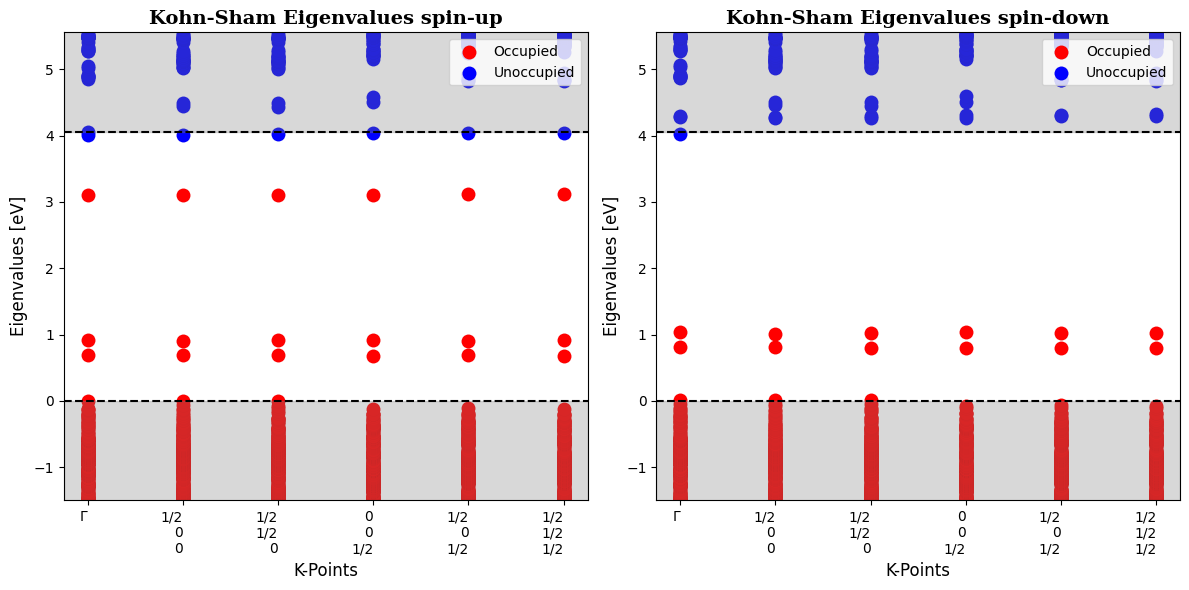

In [2]:
from VaspDefAnalysis.plotter.plot_KS_eigenvalues import PlotKohnShamEigenvalue

# The VBM and CBM
VBM = 5.9732
CBM = 10.0299

# Creat an istance of the VaspRunAnalysis class
vasprun_path = '/home/luis/master_thesis_uio/thesis_project/output_from_vasp_saga/project_AlN/calcualtion_steps/supercell/defect_supercell/GGA-PBE/defect/C_N-C_Al/C_N-C_Al_-1/vasprun.xml'
fig = PlotKohnShamEigenvalue.get_plot_KS_eigenvalues(vasprun_path=vasprun_path,VBM=VBM,CBM=CBM,layout="horizontal")

In [8]:
import os
import matplotlib.pyplot as plt

# Extract the directory where the vasprun.xml is located
directory = os.path.dirname(vasprun_path)

# Extract the name of the parent directory
parent_dir_name = os.path.basename(directory)

# Define the output file path (you can change the file name if necessary)
output_file = os.path.join(directory,f"Kohn_Sham_eigenvalues_{parent_dir_name}.png")

# Save the plot in the same directory as the vasprun.xml
fig.savefig(output_file)

# Optionally, show the plot (if needed)
#plt.figure(fig)
#plt.show(fig)
